In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

#implementation of neural network with 1 hidden layer

In [2]:
digits = load_digits()

# split data to train and test 
train_size = int(0.7*digits.data.shape[0])
X = digits.data[:train_size]
y_train = digits.target[:train_size]
y_train = y_train.reshape((len(y_train),1))

x_test = digits.data[train_size:]
y_test = digits.target[train_size:]
y_test = y_test.reshape((len(y_test),1))
print(X.shape, y_train.shape, x_test.shape, y_test.shape)

(1257, 64) (1257, 1) (540, 64) (540, 1)


In [3]:
def binarized_labels(y, num_of_labels):
    """Return values of labels as arrays of binary data"""
    y_new = np.zeros((y.shape[0], num_of_labels))
    for k in range(len(y)):
        y_new[k][y[k]] = 1
    return y_new  

In [4]:
y = binarized_labels(y_train, 10)

In [5]:
def initialize_theta(L_in, L_out, eps_init=0.12):
    """Randomly initialize matrices of weights with numbers from interval [-eps, eps]"""
    np.random.seed(3)
    return np.random.randn(L_out, 1 + L_in)*2*eps_init - eps_init

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
def forward_prop(X, y, Theta1, Theta2): 
    m = X.shape[0]
    a1 = np.insert(X, 0, 1, axis = 1)
    z2 = np.dot(a1, Theta1.T)
    a2 = sigmoid(z2)
    a2 = np.insert(a2, 0, 1, axis = 1)
    z3 = np.dot(a2, Theta2.T)
    htheta = sigmoid(z3)
    return a1, a2, htheta

In [8]:
def cost_func(htheta, y, Theta1, Theta2, rlambda):
    m = y.shape[0]
    cost = (1/m) * np.sum(- y * np.log(htheta) - (1 - y) * np.log(1 - htheta))
    regularization = rlambda/(2*m)*(np.sum(Theta1[:, 1:]**2) + np.sum(Theta2[:, 1:]**2))
    cost += regularization
    return cost

In [9]:
def backprop(y, htheta, a1, a2, Theta1, Theta2, rlambda):
    m = y.shape[0]
    delta_3 = htheta - y
    delta_2 = np.dot(delta_3, Theta2) * a2 * (1 - a2)
    
    theta1_grad = np.dot(delta_2[:, 1:].T, a1)/m
    theta2_grad = np.dot(delta_3.T, a2)/m
    
    theta1_grad[:, 1:] += (rlambda/m) * Theta1[:, 1:]
    theta2_grad[:, 1:] += (rlambda/m) * Theta2[:, 1:]
    return theta1_grad, theta2_grad  

In [10]:
def grad_descent(X, y, eps_init=0.05, n_hidden_layer=25, alpha=0.1, n_iter=10000, rlambda = 9):    
    
    m = X.shape[1]
    K = y.shape[1]
    
    Theta1 = initialize_theta(m, n_hidden_layer)
    Theta2 = initialize_theta(n_hidden_layer, K)
    
    costs = [100] 
    for i in range(n_iter):
        a1, a2, htheta = forward_prop(X, y, Theta1, Theta2)
        cost = cost_func(htheta, y, Theta1, Theta2, rlambda)
        costs.append(cost)
        
        theta1_grad, theta2_grad = backprop(y, htheta, a1, a2, Theta1, Theta2, rlambda)
        
        Theta1 -= alpha*theta1_grad
        Theta2 -= alpha*theta2_grad
    return Theta1, Theta2, costs    

In [11]:
res1, res2, costs = grad_descent(X, y)
print('Value of cost function on training set: ', costs[-1])

Value of cost function on training set:  0.72005219037


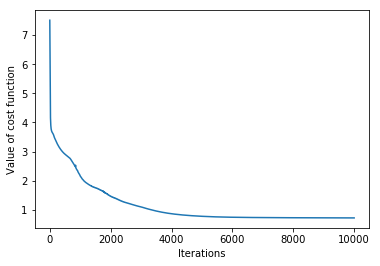

In [12]:
plt.plot(costs[1:])
plt.xlabel('Iterations')
plt.ylabel('Value of cost function')
plt.show()

In [13]:
# making prediction
a1_res, a2_res, htheta_res = forward_prop(x_test, y, res1, res2)
pred = htheta_res.argmax(axis = 1)

#calculating accuracy
print('Accuracy:', sum(pred == y_test.ravel())/len(pred))

Accuracy: 0.931481481481
